In [ ]:
## Flight data has data about flights

## Joining the weather data and the flight data for the data prepreocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
import os
import numpy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [ ]:
flight2016 =pd.read_csv('/content/drive/MyDrive/Swarup_Flight_Weather_Dataset/merged_file2016_trimmed_final.csv')
flight2017=pd.read_csv('/content/drive/MyDrive/Swarup_Flight_Weather_Dataset/merged_file2017_trimmed_final.csv')

In [ ]:
flight2016.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
0,2016,2,5,1,2016-05-01,JFK,LAX,900,931.0,31.0,1.0,1217,1226.0,9.0,0.0
1,2016,2,5,2,2016-05-02,JFK,LAX,900,853.0,0.0,0.0,1217,1216.0,0.0,0.0
2,2016,2,5,3,2016-05-03,JFK,LAX,900,857.0,0.0,0.0,1217,1226.0,9.0,0.0
3,2016,2,5,4,2016-05-04,JFK,LAX,900,854.0,0.0,0.0,1217,1157.0,0.0,0.0
4,2016,2,5,5,2016-05-05,JFK,LAX,900,857.0,0.0,0.0,1217,1214.0,0.0,0.0


In [ ]:
flight2017.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
0,2017,2,4,1,2017-04-01,LAS,JFK,1024,1129.0,65.0,1.0,1829,1920.0,51.0,1.0
1,2017,2,4,1,2017-04-01,LAS,LAX,802,801.0,0.0,0.0,919,902.0,0.0,0.0
2,2017,2,4,1,2017-04-01,ATL,DFW,1920,1918.0,0.0,0.0,2052,2027.0,0.0,0.0
3,2017,2,4,1,2017-04-01,DFW,ATL,1717,1713.0,0.0,0.0,2027,2011.0,0.0,0.0
4,2017,2,4,1,2017-04-01,LAX,JFK,825,839.0,14.0,0.0,1655,1653.0,0.0,0.0


In [ ]:
Flight = pd.concat([flight2016,flight2017], ignore_index=True)
Flight

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15
0,2016,2,5,1,2016-05-01,JFK,LAX,900,931.0,31.0,1.0,1217,1226.0,9.0,0.0
1,2016,2,5,2,2016-05-02,JFK,LAX,900,853.0,0.0,0.0,1217,1216.0,0.0,0.0
2,2016,2,5,3,2016-05-03,JFK,LAX,900,857.0,0.0,0.0,1217,1226.0,9.0,0.0
3,2016,2,5,4,2016-05-04,JFK,LAX,900,854.0,0.0,0.0,1217,1157.0,0.0,0.0
4,2016,2,5,5,2016-05-05,JFK,LAX,900,857.0,0.0,0.0,1217,1214.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2017,3,7,1,2017-07-01,ATL,LAS,600,611.0,11.0,0.0,710,719.0,9.0,0.0
1877292,2017,3,7,1,2017-07-01,ATL,LAX,920,915.0,0.0,0.0,1100,1057.0,0.0,0.0
1877293,2017,3,7,1,2017-07-01,ATL,LAX,1630,1629.0,0.0,0.0,1810,1818.0,8.0,0.0
1877294,2017,3,7,1,2017-07-01,ATL,MCO,1705,1701.0,0.0,0.0,1840,1907.0,27.0,1.0


In [ ]:
Flight = Flight.dropna(axis=0)


def format_date(x):
  #print(x)
  x=int(x)
  x=str(x)
  x=x[0:-2]+"00"
  x=int(x)
  return x


Flight['Time'] = Flight['ArrTime'].apply(format_date)

<ipython-input-70-0a44fa2aa64a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flight['Time'] = Flight['ArrTime'].apply(format_date)


In [ ]:
Flight.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,Time
0,2016,2,5,1,2016-05-01,JFK,LAX,900,931.0,31.0,1.0,1217,1226.0,9.0,0.0,1200
1,2016,2,5,2,2016-05-02,JFK,LAX,900,853.0,0.0,0.0,1217,1216.0,0.0,0.0,1200
2,2016,2,5,3,2016-05-03,JFK,LAX,900,857.0,0.0,0.0,1217,1226.0,9.0,0.0,1200
3,2016,2,5,4,2016-05-04,JFK,LAX,900,854.0,0.0,0.0,1217,1157.0,0.0,0.0,1100
4,2016,2,5,5,2016-05-05,JFK,LAX,900,857.0,0.0,0.0,1217,1214.0,0.0,0.0,1200


In [ ]:
Weather = pd.read_csv('/content/drive/MyDrive/Swarup_Flight_Weather_Dataset/combined_final_weather_data1.csv')
Weather.head()

,airport,date,time,temperature_f,wind_speed,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
0,EWR,2016-02-01,0,40,9,100,100,36,13,40,1012,0,0.1,248,230
1,EWR,2016-02-01,100,39,10,100,100,35,16,39,1011,0,0.1,248,228
2,EWR,2016-02-01,200,39,11,100,100,34,18,39,1010,0,0.1,248,226
3,EWR,2016-02-01,300,38,12,100,100,32,20,38,1009,1,0.1,248,224
4,EWR,2016-02-01,400,38,13,100,100,33,21,38,1009,2,0.1,248,222


In [ ]:
Merged_Data = Flight.merge(Weather,left_on=['FlightDate','Time','Dest'],right_on=['date','time','airport'])

In [ ]:
Merged_Data.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,...,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
0,2016,2,5,1,2016-05-01,JFK,LAX,900,931.0,31.0,...,76,56,65,15,54,1013,10,0.0,116,199
1,2016,2,5,1,2016-05-01,JFK,LAX,1000,1002.0,2.0,...,76,56,65,15,54,1013,10,0.0,116,199
2,2016,2,5,1,2016-05-01,MIA,LAX,925,926.0,1.0,...,76,56,65,15,54,1013,10,0.0,116,199
3,2016,2,5,1,2016-05-01,ORD,LAX,955,955.0,0.0,...,76,56,65,15,54,1013,10,0.0,116,199
4,2016,2,5,1,2016-05-01,DFW,LAX,1055,1051.0,0.0,...,76,56,65,15,54,1013,10,0.0,116,199


In [ ]:
Merged_Data.to_csv('/content/drive/MyDrive/Swarup_Flight_Weather_Dataset/Merged_Data.csv')

In [29]:
df_combined = pd.read_csv("/content/drive/MyDrive/Swarup_Flight_Weather_Dataset/Merged_Data.csv")

In [8]:
df_combined

,Unnamed: 0,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,...,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
0,0,2016,2,5,1,2016-05-01,JFK,LAX,900,931.0,...,76,56,65,15,54,1013,10,0.0,116,199
1,1,2016,2,5,1,2016-05-01,JFK,LAX,1000,1002.0,...,76,56,65,15,54,1013,10,0.0,116,199
2,2,2016,2,5,1,2016-05-01,MIA,LAX,925,926.0,...,76,56,65,15,54,1013,10,0.0,116,199
3,3,2016,2,5,1,2016-05-01,ORD,LAX,955,955.0,...,76,56,65,15,54,1013,10,0.0,116,199
4,4,2016,2,5,1,2016-05-01,DFW,LAX,1055,1051.0,...,76,56,65,15,54,1013,10,0.0,116,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850476,1850476,2017,3,7,17,2017-07-17,LAX,IAH,42,37.0,...,95,37,78,8,76,1012,5,1.6,143,299
1850477,1850477,2017,3,7,17,2017-07-17,SEA,IAH,2230,2335.0,...,95,37,78,8,76,1012,5,1.6,143,299
1850478,1850478,2017,3,7,17,2017-07-17,IAH,MIA,1915,2242.0,...,77,8,83,15,75,1015,10,0.2,113,182
1850479,1850479,2017,3,7,17,2017-07-17,ORD,SEA,2315,57.0,...,90,0,49,13,47,1021,10,0.0,113,40


In [9]:
df_combined[['ArrDel15','ArrDelayMinutes']]

,ArrDel15,ArrDelayMinutes
0,0.0,9.0
1,0.0,0.0
2,1.0,21.0
3,0.0,9.0
4,0.0,0.0
...,...,...
1850476,0.0,0.0
1850477,1.0,67.0
1850478,1.0,193.0
1850479,1.0,83.0


In [10]:
columns_list = df_combined.columns.tolist()
print(columns_list)

['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate', 'Origin', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'Time', 'airport', 'date', 'time', 'temperature_f', 'wind_speed', 'humidity', 'cloud_cover', 'wind_chill_f', 'wind_gust_kmph', 'dew_point_f', 'pressure', 'visibility', 'precip_mm', 'weather_code', 'wind_dir_degree']


In [22]:

df_combined = pd.read_csv('/content/drive/MyDrive/Swarup_Flight_Weather_Dataset/Merged_Data.csv')

# Display basic statistics of the numerical columns
print(df_combined.describe())



         Unnamed: 0          Year       Quarter         Month    DayofMonth  \
count  1.850481e+06  1.850481e+06  1.850481e+06  1.850481e+06  1.850481e+06   
mean   9.252400e+05  2.016494e+03  2.515215e+00  6.544180e+00  1.576740e+01   
std    5.341880e+05  4.999631e-01  1.104745e+00  3.396924e+00  8.790736e+00   
min    0.000000e+00  2.016000e+03  1.000000e+00  1.000000e+00  1.000000e+00   
25%    4.626200e+05  2.016000e+03  2.000000e+00  4.000000e+00  8.000000e+00   
50%    9.252400e+05  2.016000e+03  3.000000e+00  7.000000e+00  1.600000e+01   
75%    1.387860e+06  2.017000e+03  3.000000e+00  9.000000e+00  2.300000e+01   
max    1.850480e+06  2.017000e+03  4.000000e+00  1.200000e+01  3.100000e+01   

         CRSDepTime       DepTime  DepDelayMinutes      DepDel15  \
count  1.850481e+06  1.850481e+06     1.850481e+06  1.850481e+06   
mean   1.327070e+03  1.328205e+03     1.403138e+01  2.008926e-01   
std    5.113918e+02  5.269179e+02     4.151764e+01  4.006680e-01   
min    1.000000e

<Figure size 1500x1500 with 0 Axes>

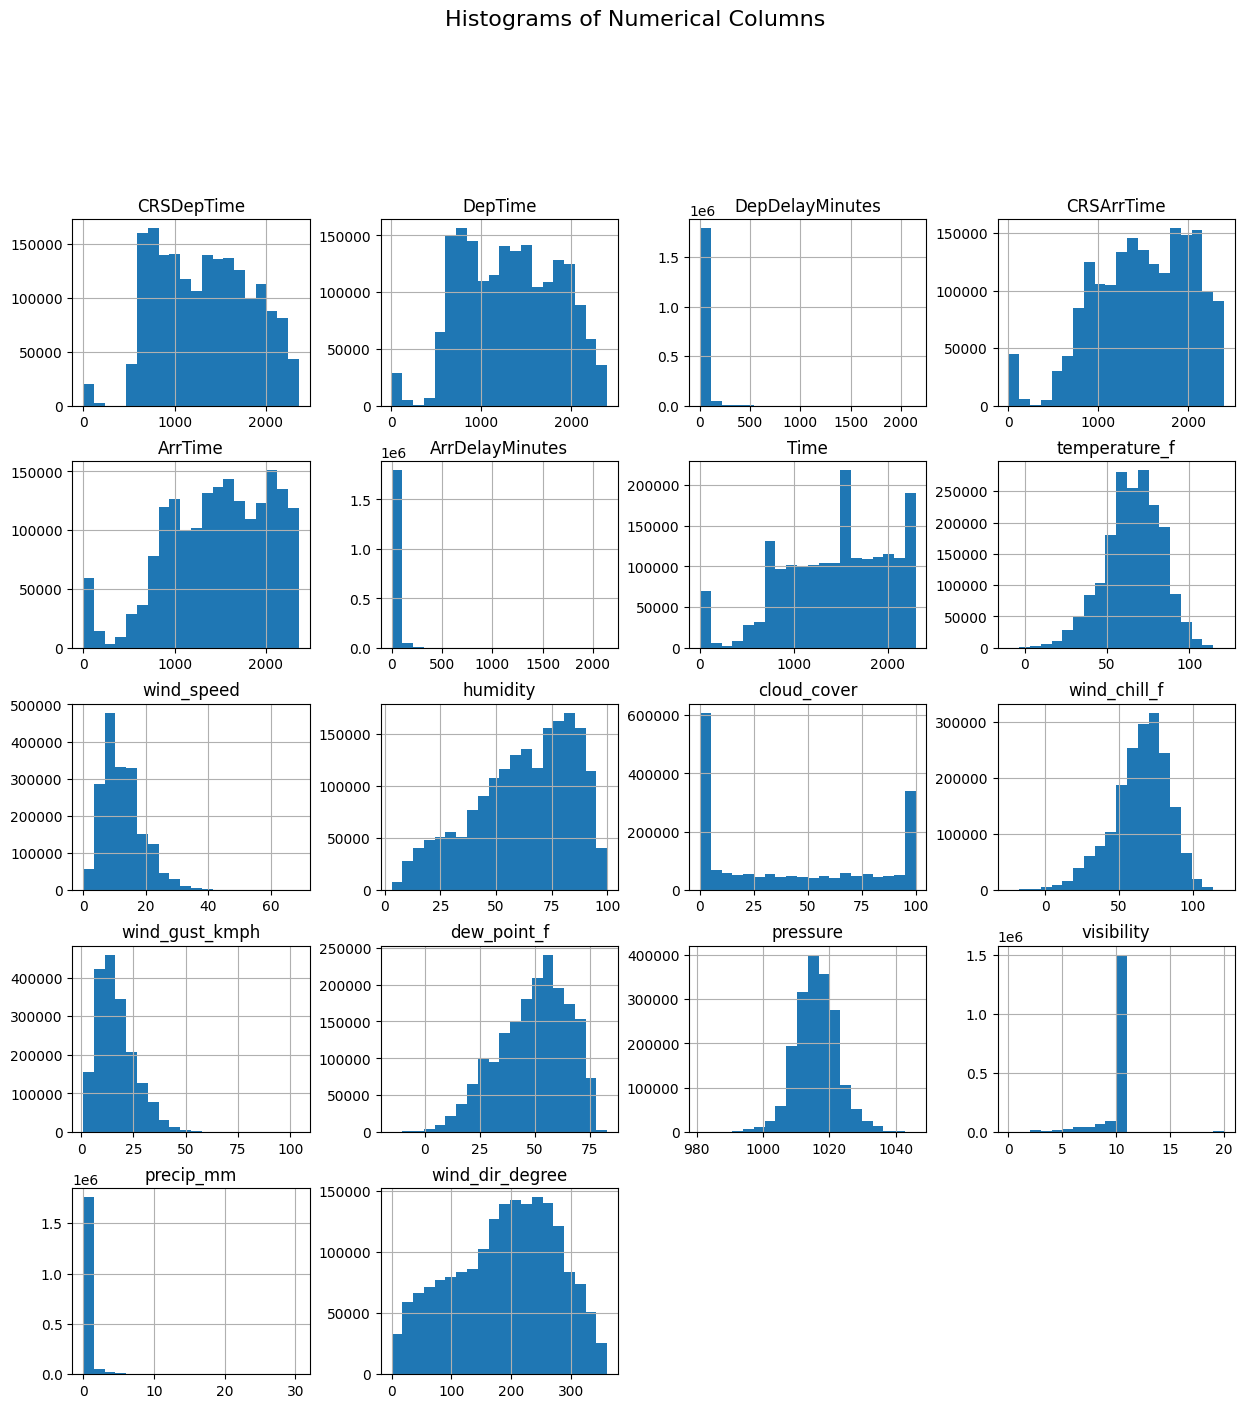

In [23]:
# Univariate Analysis

# Plot histograms for numerical columns
numerical_columns = ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes',
                     'Time', 'temperature_f', 'wind_speed', 'humidity', 'cloud_cover', 'wind_chill_f',
                     'wind_gust_kmph', 'dew_point_f', 'pressure', 'visibility', 'precip_mm', 'wind_dir_degree']

plt.figure(figsize=(15, 15))
df_combined[numerical_columns].hist(bins=20, figsize=(15, 15))
plt.suptitle('Histograms of Numerical Columns', y=1.02, size=16)
plt.show()

In [24]:
print(df_combined.isnull().sum())

# this implies that there are no null values in the data

Unnamed: 0         0
Year               0
Quarter            0
Month              0
DayofMonth         0
FlightDate         0
Origin             0
Dest               0
CRSDepTime         0
DepTime            0
DepDelayMinutes    0
DepDel15           0
CRSArrTime         0
ArrTime            0
ArrDelayMinutes    0
ArrDel15           0
Time               0
airport            0
date               0
time               0
temperature_f      0
wind_speed         0
humidity           0
cloud_cover        0
wind_chill_f       0
wind_gust_kmph     0
dew_point_f        0
pressure           0
visibility         0
precip_mm          0
weather_code       0
wind_dir_degree    0
dtype: int64


<ipython-input-25-c03994ca43ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_combined.corr()
<ipython-input-25-c03994ca43ad>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  subset_corr_matrix = df_combined[highly_correlated_features].corr()


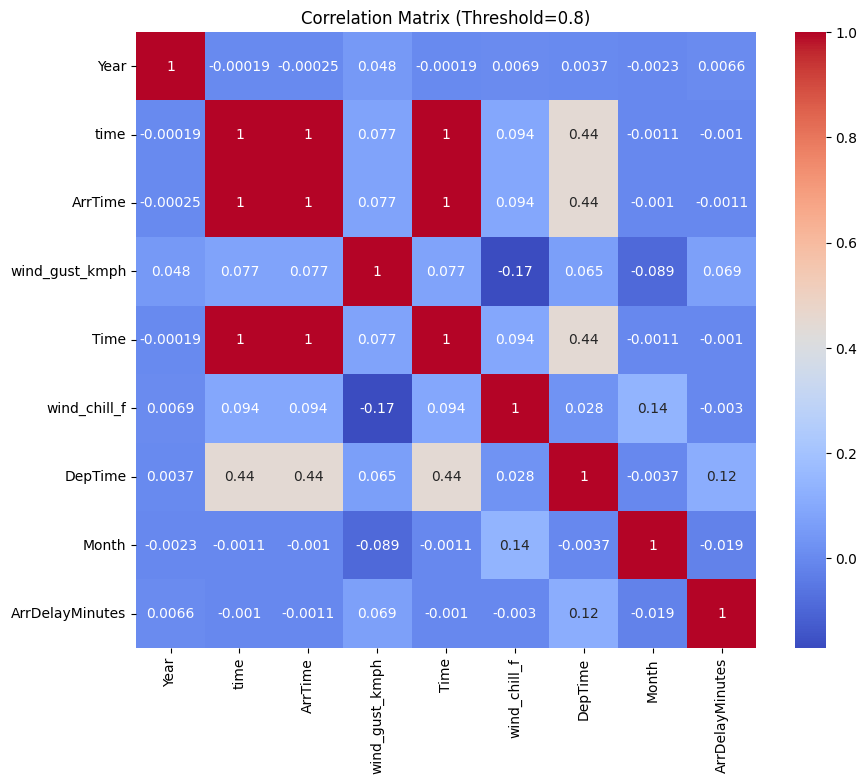

In [25]:
corr_matrix = df_combined.corr()
threshold = 0.8  # Set your correlation threshold

# Select highly correlated features
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# Create a subset of the original correlation matrix with only highly correlated features
subset_corr_matrix = df_combined[highly_correlated_features].corr()

# Plot the subset correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix (Threshold={threshold})')
plt.show()

In [30]:
# Drop irrelevant columns
df_combined = df_combined.drop(['FlightDate', 'airport', 'date', 'time'], axis=1)

# Convert categorical variables into numerical using one-hot encoding
df = pd.get_dummies(df_combined, columns=['Origin', 'Dest'])

In [33]:


# Convert categorical variables into numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_combined['Origin'] = label_encoder.fit_transform(df_combined['Origin'])
df_combined['Dest'] = label_encoder.fit_transform(df_combined['Dest'])

# Handle missing values (you may choose a different strategy based on your data)
imputer = SimpleImputer(strategy='mean')
df_combined['DepDelayMinutes'] = imputer.fit_transform(df_combined[['DepDelayMinutes']])

# Feature scaling (standardization)
scaler = StandardScaler()
df_combined[['temperature_f', 'wind_speed', 'humidity', 'cloud_cover', 'wind_chill_f', 'wind_gust_kmph',
    'dew_point_f', 'pressure', 'visibility', 'precip_mm', 'wind_dir_degree']] = scaler.fit_transform(
    df_combined[['temperature_f', 'wind_speed', 'humidity', 'cloud_cover', 'wind_chill_f', 'wind_gust_kmph',
        'dew_point_f', 'pressure', 'visibility', 'precip_mm', 'wind_dir_degree']])

# Split the data into features (X) and target variable (y)
X = df_combined.drop('ArrDel15', axis=1)
y = df_combined['ArrDel15']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train

,Unnamed: 0,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,...,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
1590052,1590052,2017,1,2,5,DEN,LAS,900,856.0,0.0,...,0.419420,-0.756379,-0.926233,-1.204743,-0.712005,0.310194,0.293644,-0.260127,116,0.968676
849597,849597,2016,2,4,8,DEN,CLT,1205,1226.0,21.0,...,-1.356381,-0.527589,-0.450602,0.346817,-1.332187,-0.799039,0.293644,-0.260127,113,0.887440
407843,407843,2016,4,11,4,DEN,PHX,1500,1457.0,0.0,...,-0.779246,-1.061433,1.134837,-1.315569,0.838450,-0.006729,0.293644,-0.260127,113,-0.563195
1266619,1266619,2017,1,1,13,SEA,PHX,1759,1757.0,0.0,...,-0.646061,1.480678,-0.133514,-0.761440,-0.463932,-0.323653,0.293644,-0.260127,122,-2.002225
332,332,2016,2,5,18,JFK,LAX,930,928.0,0.0,...,0.818976,0.514676,-0.027818,-0.207312,0.528359,-0.165191,0.293644,-0.260127,116,0.469657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,2016,3,8,11,CLT,ORD,2240,2236.0,0.0,...,0.375025,1.480678,0.976293,1.455074,1.396614,-0.799039,-0.277361,1.844789,356,0.342001
1414414,1414414,2017,4,12,10,MCO,LAX,1853,1858.0,5.0,...,-1.667147,0.641782,0.289270,1.122597,-1.022096,0.627118,6.003695,-0.260127,116,-2.106671
131932,131932,2016,3,9,3,EWR,DFW,1600,1555.0,0.0,...,-0.690456,-0.654695,1.134837,0.014340,0.962487,-0.482115,0.293644,-0.260127,113,-0.586405
671155,671155,2016,1,1,12,LAS,DEN,1705,1659.0,0.0,...,0.685790,-0.756379,-1.877497,0.125165,-1.890351,1.260966,0.293644,-0.260127,113,0.167925


In [21]:
y_train

1590052    0.0
849597     0.0
407843     0.0
1266619    0.0
332        0.0
          ... 
259178     0.0
1414414    0.0
131932     0.0
671155     0.0
121958     0.0
Name: ArrDel15, Length: 1480384, dtype: float64

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)